<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-setup" data-toc-modified-id="Notebook-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook setup</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Function-for-counting-numbers-of-mCAss" data-toc-modified-id="Function-for-counting-numbers-of-mCAss-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Function for counting numbers of mCAss</a></span></li></ul></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import data</a></span><ul class="toc-item"><li><span><a href="#UK-Biobank-mCA-calls" data-toc-modified-id="UK-Biobank-mCA-calls-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>UK Biobank mCA calls</a></span></li></ul></li><li><span><a href="#Number-of-observations-of-each-mCA-(Supplementary-Fig.-3)" data-toc-modified-id="Number-of-observations-of-each-mCA-(Supplementary-Fig.-3)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Number of observations of each mCA (Supplementary Fig. 3)</a></span></li><li><span><a href="#Number-of-mCAs-per-person-(Supplementary-Fig.-4)" data-toc-modified-id="Number-of-mCAs-per-person-(Supplementary-Fig.-4)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Number of mCAs per person (Supplementary Fig. 4)</a></span></li></ul></div>

In [45]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Notebook setup

In [22]:
# imported packages
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import ast
import zipfile

In [3]:
plt.style.use('cwpython.mplstyle') #use custom style file

In [20]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [17]:
neutral_color='#fdbf6f'
gain_color = '#e31a1c'
loss_color = '#a6cee3'

gain_1_color = '#67000d'
gain_2_color = '#ef3b2c'
gain_many_color = '#fcbba1'

loss_1_color = '#08519c'
loss_2_color = '#4292c6'
loss_many_color = '#9ecae1'

neutral_1_color = '#cc4c02'
neutral_2_color = '#fd8d3c'
neutral_many_color = '#fed976'

# Functions

In [4]:
def convert_back_to_list(string_list): #convert a string of a list back to a list
    return ast.literal_eval(string_list) 

## Function for counting numbers of mCAss

In [7]:
def mCA_count_number_mCAs(mCA, df, number_mCAs):
    df_mCA = df[df['annotation']==mCA]
    df_mCA_total_number = df_mCA[df_mCA['total_mCAs']==number_mCAs]
    return len(df_mCA_total_number.groupby(['ID']))

In [8]:
def mCA_count_greater_than_equal_number_mCAs(mCA, df, greater_than_equal_number_mCAs):
    df_mCA = df[df['annotation']==mCA]
    df_mCA_total_number = df_mCA[df_mCA['total_mCAs']>=greater_than_equal_number_mCAs]
    return len(df_mCA_total_number.groupby(['ID']))

# Import data

## UK Biobank mCA calls

In [14]:
zf = zipfile.ZipFile('Data_files/Supplementary_data_annotated_cw.csv.zip')
df = pd.read_csv(zf.open('Supplementary_data_annotated_cw.csv'))
df['bands_involved'] = df['bands_involved'].apply(convert_back_to_list)
df['genes_involved'] = df['genes_involved'].apply(convert_back_to_list)
df['persons_total_mCAs'] = df['persons_total_mCAs'].apply(convert_back_to_list)
df['persons_total_known_mCAs'] = df['persons_total_known_mCAs'].apply(convert_back_to_list)

# Number of observations of each mCA (Supplementary Fig. 3)

In [5]:
# Make a list of all possible mCAs
all_possible_mCAs = []
for mCA_type in ['+', '-', '=']:
    for chromosome in range(1, 23):
        for arm in ['', 'p', 'q']:
            mCA = str(chromosome)+arm+mCA_type
            if mCA not in ['13+', '13-', '13=', '13p+', '13p-', '13p=', 
                           '14+', '14-', '14=', '14p+', '14p-', '14p=', 
                           '15+', '15-', '15=', '15p+', '15p-', '15p=',
                          '21+', '21-', '21=', '21p+', '21p-', '21p=',
                          '22+', '22-', '22=', '22p+', '22p-', '22p=']:
                all_possible_mCAs.append(mCA)
print('total number of possible mCAs = ', len(all_possible_mCAs))

total number of possible mCAs =  168


In [15]:
# Make a dictionary which counts the numbers of each possible mCA (as single, +1 other or with 2+ other mCAs)
mCA_numbers_count = {}
for mCA in all_possible_mCAs:
    single_mCAs = mCA_count_number_mCAs(mCA, df, 1)
    double_mCAs = mCA_count_number_mCAs(mCA, df, 2)
    three_or_more_mCAs = mCA_count_greater_than_equal_number_mCAs(mCA, df, 3)
    mCA_numbers_count[mCA]={'single_mCA': single_mCAs, 'with_1_other_mCA': double_mCAs, 'with_2_or_more_other_mCAs': three_or_more_mCAs}

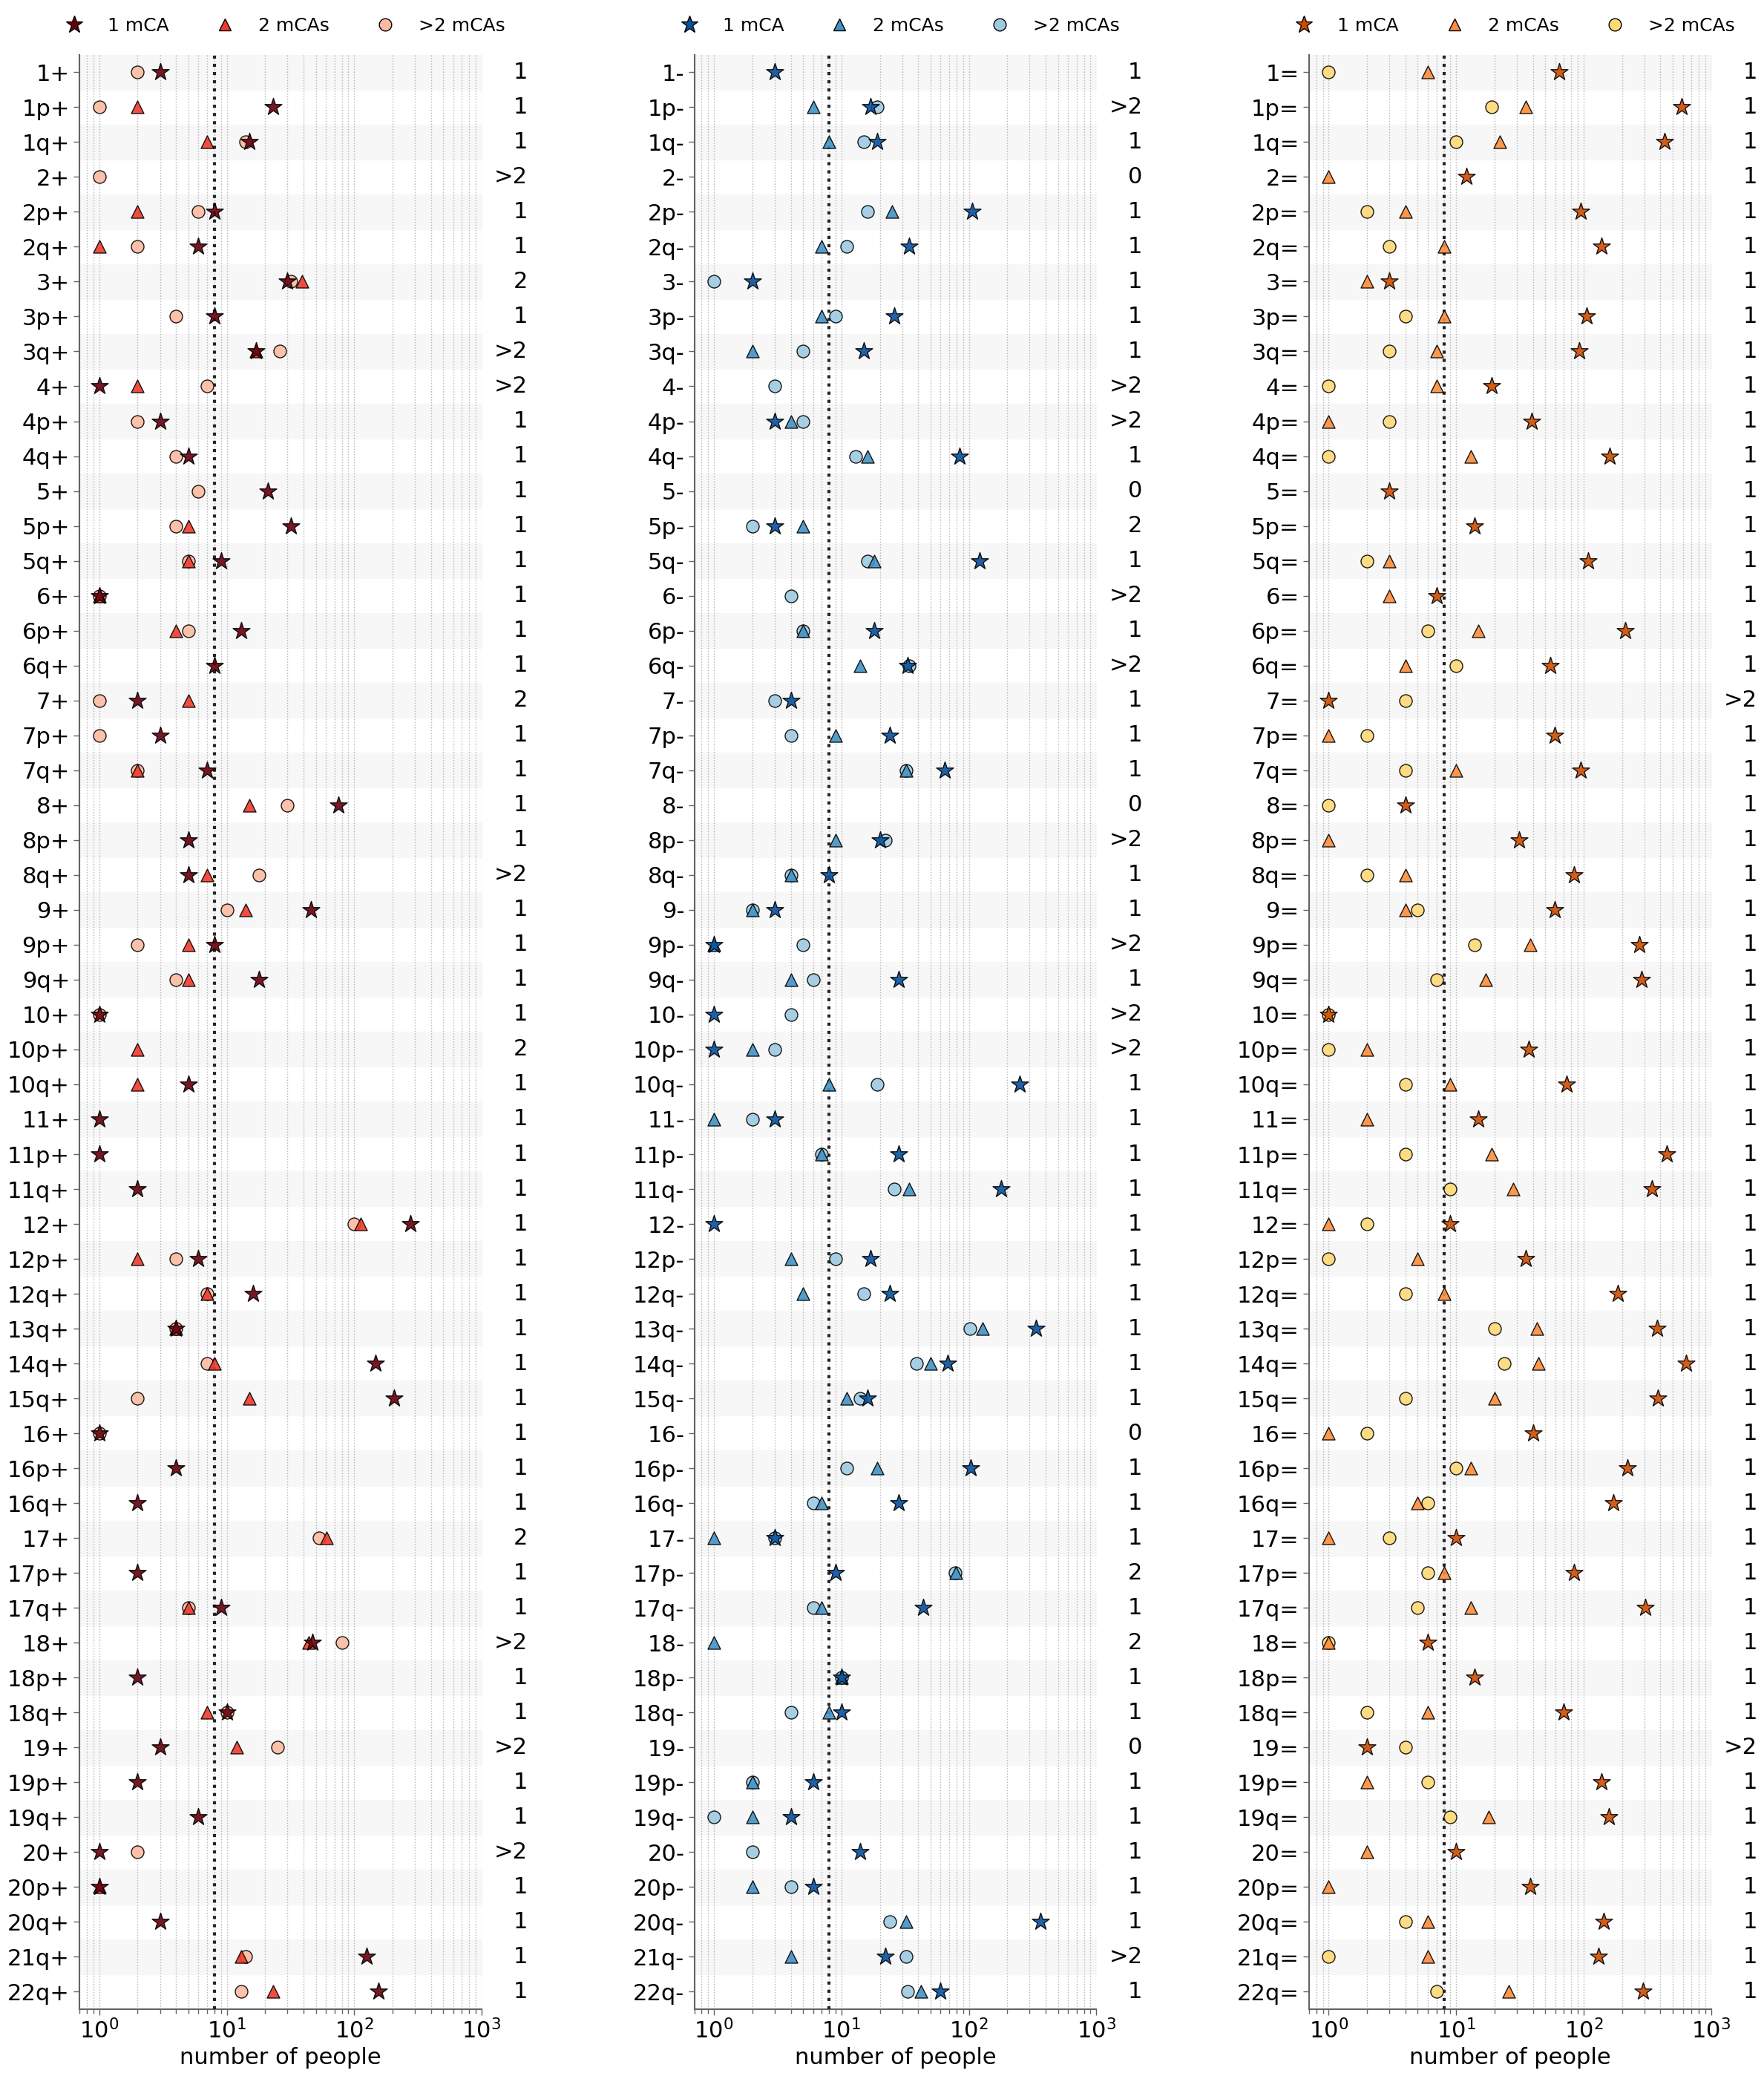

In [23]:
#Plot the number of observations of each mCA
fig, axes = plt.subplots(1, 3, figsize = (25, 28), sharey = False)
plt.subplots_adjust(wspace = 1.2)

ax1 = axes[0] #gains
ax2 = axes[1] #losses
ax3 = axes[2] #CN-LOH

colors = []

x_single_gain = []
x_double_gain = []
x_many_gain = []

x_single_loss = []
x_double_loss = []
x_many_loss = []

x_single_CNLOH = []
x_double_CNLOH = []
x_many_CNLOH = []

y_gain = []
y_loss = []
y_neutral = []

gains = []
losses = []
CNLOH = []

gain_most_common = []
loss_most_common = []
CNLOH_most_common = []


y_axis = 0
for i in reversed(all_possible_mCAs):
    if i[-1]=='+':
        single = mCA_numbers_count[i]['single_mCA']
        double = mCA_numbers_count[i]['with_1_other_mCA']
        many = mCA_numbers_count[i]['with_2_or_more_other_mCAs']
        most_common_number_people = sorted([('1', single), ('2', double), ('>=3', many)], key = lambda tup: tup[1], reverse = True)[0][1]
        most_common = sorted([('1', single), ('2', double), ('>2', many)], key = lambda tup: tup[1], reverse = True)[0][0]
        if most_common_number_people == 0:
            most_common = '0'
            
        gain_most_common.append(most_common)
        x_single_gain.append(single)
        x_double_gain.append(double)
        x_many_gain.append(many)
        y_gain.append(y_axis)
        gains.append(i)
        y_axis+=1
        
y_axis = 0
for i in reversed(all_possible_mCAs):
    if i[-1]=='-':
        single = mCA_numbers_count[i]['single_mCA']
        double = mCA_numbers_count[i]['with_1_other_mCA']
        many = mCA_numbers_count[i]['with_2_or_more_other_mCAs']
        most_common_number_people = sorted([('1', single), ('2', double), ('>=3', many)], key = lambda tup: tup[1], reverse = True)[0][1]
        most_common = sorted([('1', single), ('2', double), ('>2', many)], key = lambda tup: tup[1], reverse = True)[0][0]
        if most_common_number_people == 0:
            most_common = '0'
        
        loss_most_common.append(most_common)
        x_single_loss.append(single)
        x_double_loss.append(double)
        x_many_loss.append(many)
        y_loss.append(y_axis)
        losses.append(i)
        y_axis+=1
        
y_axis = 0
for i in reversed(all_possible_mCAs):
    if i[-1]=='=':
        single = mCA_numbers_count[i]['single_mCA']
        double = mCA_numbers_count[i]['with_1_other_mCA']
        many = mCA_numbers_count[i]['with_2_or_more_other_mCAs']
        most_common_number_people = sorted([('1', single), ('2', double), ('>=3', many)], key = lambda tup: tup[1], reverse = True)[0][1]
        most_common = sorted([('1', single), ('2', double), ('>2', many)], key = lambda tup: tup[1], reverse = True)[0][0]
        if most_common_number_people == 0:
            most_common = '0'
        
        CNLOH_most_common.append(most_common)
        x_single_CNLOH.append(single)
        x_double_CNLOH.append(double)
        x_many_CNLOH.append(many)
        y_neutral.append(y_axis)
        CNLOH.append(i)
        y_axis+=1
        
ax1.scatter(x_single_gain, y_gain, color = gain_1_color, marker = '*', s = 300, alpha = 0.9, lw = 1, edgecolor = 'k', zorder = 70)
ax1.scatter(x_double_gain, y_gain, color = gain_2_color, marker = '^', s = 150, alpha = 0.9, lw = 1, edgecolor = 'k', zorder = 60)
ax1.scatter(x_many_gain, y_gain, color = gain_many_color, marker = 'o', s = 150, alpha = 0.9, lw = 1, edgecolor = 'k', zorder = 50)
for mCA, commonest_number in zip(y_gain, gain_most_common):
    ax1.text(2.3e3, mCA, commonest_number, fontsize = 22, ha = 'right', va = 'center')

ax2.scatter(x_single_loss, y_loss, color = loss_1_color, marker = '*', s = 300, alpha = 0.9, lw = 1, edgecolor = 'k', zorder = 70)
ax2.scatter(x_double_loss, y_loss, color = loss_2_color, marker = '^', s = 150, alpha = 0.9, lw = 1, edgecolor = 'k', zorder = 60)
ax2.scatter(x_many_loss, y_loss, color = loss_many_color, marker = 'o', s = 150, alpha = 0.9, lw = 1, edgecolor = 'k', zorder = 50)
for mCA, commonest_number in zip(y_loss, loss_most_common):
    ax2.text(2.3e3, mCA, commonest_number, fontsize = 22, ha = 'right', va = 'center')

ax3.scatter(x_single_CNLOH, y_neutral, color = neutral_1_color, marker = '*', s = 300, alpha = 0.9, lw = 1, edgecolor = 'k', zorder = 70)
ax3.scatter(x_double_CNLOH, y_neutral, color = neutral_2_color, marker = '^', s = 150, alpha = 0.9, lw = 1, edgecolor = 'k', zorder = 60)
ax3.scatter(x_many_CNLOH, y_neutral, color = neutral_many_color, marker = 'o', s = 150, alpha = 0.9, lw = 1, edgecolor = 'k', zorder = 50)
for mCA, commonest_number in zip(y_neutral, CNLOH_most_common):
    ax3.text(2.3e3, mCA, commonest_number, fontsize = 22, ha = 'right', va = 'center')
    
    
ax1.set_yticks(y_gain)
ax1.set_yticklabels(gains, fontsize = 22)
    
ax2.set_yticks(y_loss)
ax2.set_yticklabels(losses, fontsize = 22)

ax3.set_yticks(y_neutral)
ax3.set_yticklabels(CNLOH, fontsize = 22)
    
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel('number of people', fontsize = 22)
    ax.set_xscale('log')
    ax.set_xlim(0.7, 1000)
    ax.tick_params(axis = 'both', which = 'major', color = grey4, length = 6, width = 1, labelsize = 22)
    ax.tick_params(axis = 'both', which='minor', color = grey4, bottom=True, width = 1, length = 4)
    for axis in ['right', 'top']:
        ax.spines[axis].set_visible(False)
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color(grey4)
    ax.plot([8, 8], [-0.5, len(y_gain)], lw = 3, color = grey5, linestyle = ':', zorder = 5)
    ax.grid(axis = 'x', zorder = 5, which = 'both', color = grey3, lw = 1, linestyle = ':')
    for i in y_gain:
        if i%2!=0: #odd numbers
            ax.fill_between([0.7, 1000], [i-0.5, i-0.5], [i+0.5, i+0.5], color = grey1, zorder = 0, alpha = 0.9)

ax1.set_ylim(-0.5, len(y_gain)-0.5)
ax2.set_ylim(-0.5, len(y_loss)-0.5)
ax3.set_ylim(-0.5, len(y_neutral)-0.5)

gains_legend = [Line2D([0], [0], marker='*', color='white', label='1 mCA only', markerfacecolor=gain_1_color, markeredgecolor = 'k', markersize=17),
                Line2D([0], [0], marker='^', color='white', label='total 2 mCAs', markerfacecolor=gain_2_color, markeredgecolor = 'k', markersize=12),
                Line2D([0], [0], marker='o', color='white', label='total >= 3 mCAs', markerfacecolor=gain_many_color, markeredgecolor = 'k', markersize=12)]

loss_legend = [Line2D([0], [0], marker='*', color='white', label='1 mCA only', markerfacecolor=loss_1_color, markeredgecolor = 'k', markersize=17),
                Line2D([0], [0], marker='^', color='white', label='total 2 mCAs', markerfacecolor=loss_2_color, markeredgecolor = 'k', markersize=12),
                Line2D([0], [0], marker='o', color='white', label='total >= 3 mCAs', markerfacecolor=loss_many_color, markeredgecolor = 'k', markersize=12)]

CNLOH_legend = [Line2D([0], [0], marker='*', color='white', label='1 mCA only', markerfacecolor=neutral_1_color, markeredgecolor = 'k', markersize=17),
                Line2D([0], [0], marker='^', color='white', label='total 2 mCAs', markerfacecolor=neutral_2_color, markeredgecolor = 'k', markersize=12),
                Line2D([0], [0], marker='o', color='white', label='total >= 3 mCAs', markerfacecolor=neutral_many_color, markeredgecolor = 'k', markersize=12)]

ax1.legend(gains_legend, ['1 mCA', '2 mCAs', '>2 mCAs'], loc = 'center', bbox_to_anchor=(0.5, 1.015), ncol = 3, fontsize = 18, fancybox = True, borderpad = 0.5)
ax2.legend(loss_legend, ['1 mCA', '2 mCAs', '>2 mCAs'], loc = 'center', bbox_to_anchor=(0.5, 1.015), ncol = 3, fontsize = 18, fancybox = True, borderpad = 0.5)
ax3.legend(CNLOH_legend, ['1 mCA', '2 mCAs', '>2 mCAs'], loc = 'center', bbox_to_anchor=(0.5, 1.015), ncol = 3, fontsize = 18, fancybox = True, borderpad = 0.5)

plt.tight_layout()
# plt.savefig('Figures/Supplement_number_of_observations_of_each_possible_mCA.pdf')
plt.show()

# Number of mCAs per person (Supplementary Fig. 4)

In [24]:
#Group together all entries from the same person and keep a column to count how many mCAs they have
supp_df_grouped = df.groupby(['ID','AGE', 'PREV_CANCER']).size().reset_index(name='COUNT')
supp_df_grouped

,ID,AGE,PREV_CANCER,COUNT
0,1,60-65,1,4
1,2,55-60,0,1
2,3,45-50,1,1
3,4,60-65,0,1
4,5,55-60,0,2
...,...,...,...,...
17106,17107,45-50,0,1
17107,17108,65-70,0,1
17108,17109,60-65,0,1
17109,17110,55-60,0,1


In [25]:
#create dataframes of those with and without previous cancer
mCA_no_cancer = supp_df_grouped[supp_df_grouped['PREV_CANCER'] == 0]
mCA_cancer = supp_df_grouped[supp_df_grouped['PREV_CANCER'] == 1]

In [26]:
#create lists of number of mCAs for a) everyone, b) those without cancer, c) those with cancer
mCA_count = supp_df_grouped['COUNT'].tolist()
mCA_count_no_cancer = mCA_no_cancer['COUNT'].tolist()
mCA_count_cancer = mCA_cancer['COUNT'].tolist()

In [27]:
#create dictionaries of keys = counts and values = number of that count for all, cancer and no previous cancer
mCA_counts_dict = {}
for i in mCA_count:
    if i in mCA_counts_dict.keys():
        mCA_counts_dict[i]+=1
    else:
        mCA_counts_dict[i]=1
        
mCA_counts_dict_no_cancer = {}
for i in mCA_count_no_cancer:
    if i in mCA_counts_dict_no_cancer.keys():
        mCA_counts_dict_no_cancer[i]+=1
    else:
        mCA_counts_dict_no_cancer[i]=1
        
mCA_counts_dict_cancer = {}
for i in mCA_count_cancer:
    if i in mCA_counts_dict_cancer.keys():
        mCA_counts_dict_cancer[i]+=1
    else:
        mCA_counts_dict_cancer[i]=1

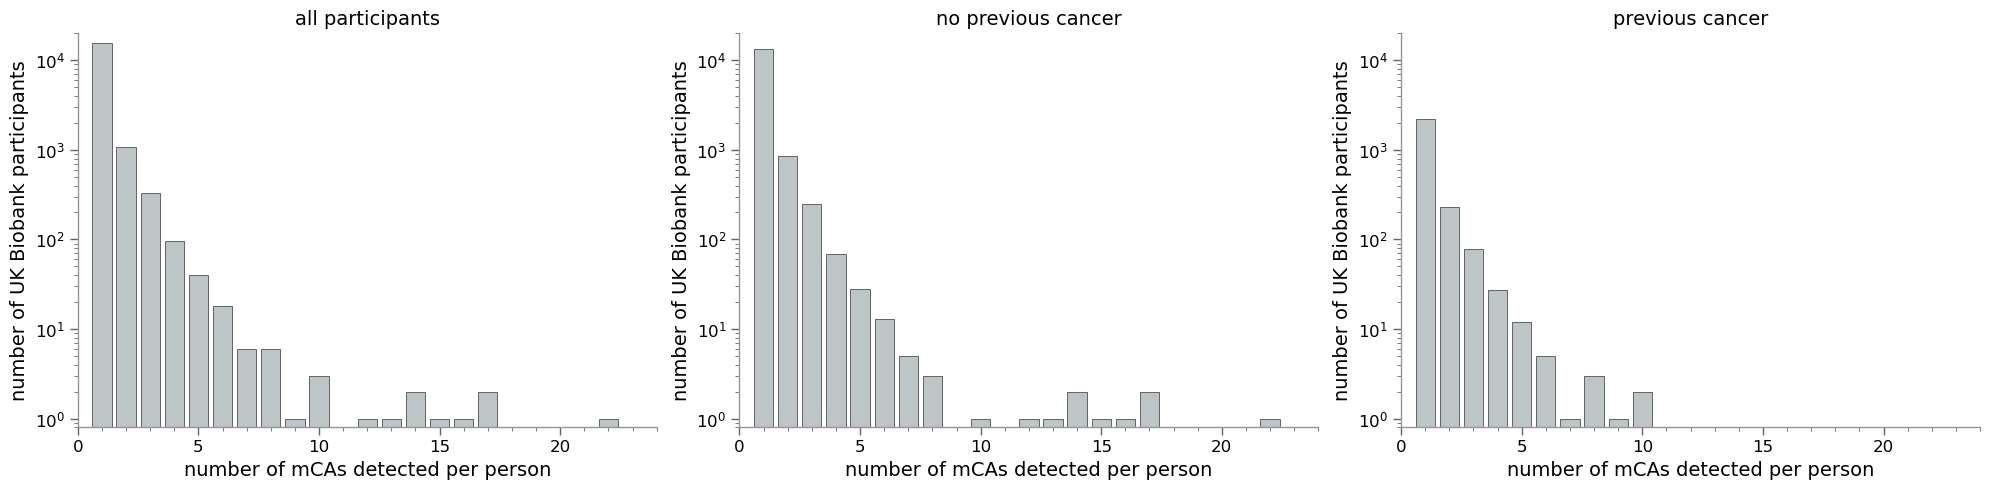

In [28]:
#number of mCAs per participant
plt.close('all')
fig, axes = plt.subplots(figsize=(20, 5), nrows=1, ncols=3)
fig.subplots_adjust(hspace=0.2, wspace = 0.2)

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

x = []
y = []

for k, v in mCA_counts_dict.items():
    x.append(k)
    y.append(v)
    
ax1.bar(x, y, color = '#bec5c6', linewidth=0.7, edgecolor = grey4)
    
x = []
y = []

for k, v in mCA_counts_dict_no_cancer.items():
    x.append(k)
    y.append(v)
    
ax2.bar(x, y, color = '#bec5c6', linewidth=0.7, edgecolor = grey4)
    
x = []
y = []

for k, v in mCA_counts_dict_cancer.items():
    x.append(k)
    y.append(v)
    
ax3.bar(x, y, color = '#bec5c6', linewidth=0.7, edgecolor = grey4)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_xlabel('number of mCAs detected per person')
    ax.set_ylabel('number of UK Biobank participants')
    ax.tick_params(axis = 'both', which = 'both', color = grey4)
    ax.set_ylim(0.8, 20000)
    ax.set_xlim(0, 24)


ax1.set_title('all participants')
ax2.set_title('no previous cancer')
ax3.set_title('previous cancer')

plt.tight_layout()
# plt.savefig('Figures/Supplement_number_of_MCAs_per_person_UK.pdf')
plt.show()